# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14)  #70k = 100 %   60k = 85,7%

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

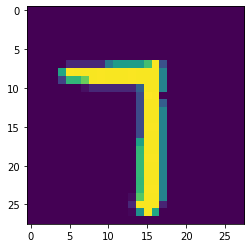

In [5]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(X_train[620,:],(28,28)))

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [6]:
#---------INIT----------#
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

bay=GaussianNB()
lin=linear_model.SGDClassifier(loss='log', max_iter=60)
rfc=RandomForestClassifier()

In [7]:
#Bay
bay.fit(X_train,y_train)

GaussianNB()

In [8]:
#lin
lin.fit(X_train,y_train)

C:\Users\sauer\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(loss='log', max_iter=60)

In [9]:
#rfc
rfc.fit(X_train,y_train)

RandomForestClassifier()

## ACCURACY

In [10]:
#Bay
accuracy_score(y_train, bay.predict(X_train))

0.560939550490872

In [11]:
confusion_matrix(y_train, bay.predict(X_train))

array([[5479,   13,   29,   16,   10,   11,  146,    5,  145,   95],
       [   3, 6395,   15,   25,    3,    8,   76,    2,  153,   69],
       [ 668,  162, 1706,  438,   28,   12, 1516,   17, 1375,   89],
       [ 491,  317,   53, 2181,   16,    4,  295,   57, 2097,  649],
       [ 194,   46,   42,   30,  997,   26,  533,   40, 1147, 2826],
       [ 772,  145,   31,  120,   33,  203,  285,   16, 3262,  584],
       [  68,  108,   26,    3,    5,   21, 5508,    0,  116,    8],
       [  29,   48,    7,   56,   50,    5,   19, 2047,  173, 3872],
       [ 108,  776,   25,   42,   25,   29,  100,   10, 3601, 1133],
       [  37,   41,   17,    7,   37,    2,    2,   83,  103, 5651]],
      dtype=int64)

In [12]:
#lin
accuracy_score(y_train, lin.predict(X_train))

0.8676057741822953

In [13]:
confusion_matrix(y_train, lin.predict(X_train))

array([[5808,    1,   57,    2,    2,   29,    6,    4,   35,    5],
       [   1, 6557,   91,    2,    7,   11,    4,   10,   59,    7],
       [  30,   20, 5773,    9,   18,    8,   27,   37,   74,   15],
       [  56,   30,  909, 3994,    6,  809,    9,   62,  214,   71],
       [  23,   21,  446,   16, 4799,   51,   14,   77,  170,  264],
       [  43,   27,  206,   39,   35, 4763,   65,   24,  194,   55],
       [  70,   16,  362,    1,   15,  125, 5206,   11,   55,    2],
       [  12,   14,  201,   13,   38,    9,    1, 5873,   40,  105],
       [  47,  119,  541,   29,   20,  282,   23,   31, 4714,   43],
       [  32,   25,  202,   30,  133,  137,    0,  422,  257, 4742]],
      dtype=int64)

In [14]:
#rfc
accuracy_score(y_train, rfc.predict(X_train))

1.0

In [15]:
confusion_matrix(y_train, rfc.predict(X_train))

array([[5949,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6749,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6011,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6160,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5881,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5451,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5863,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6306,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5849,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5980]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [16]:
#import
from sklearn.metrics import f1_score

In [17]:
#BAYES
bayes_acc_train=accuracy_score(y_train,bay.predict(X_train))
bayes_acc_test = accuracy_score(y_test, bay.predict(X_test))
bayes_f1 = f1_score(y_test, bay.predict(X_test), average='micro')
print("bayes-train-acc:",bayes_acc_train)
print("bayes-test-acc:",bayes_acc_test)
print("bayes-f1:",bayes_f1)

bayes-train-acc: 0.560939550490872
bayes-test-acc: 0.5616773798591981
bayes-f1: 0.5616773798591981


In [18]:
#LIN
lin_acc_train = accuracy_score(y_train, lin.predict(X_train))
lin_acc_test = accuracy_score(y_test, lin.predict(X_test))
lin_f1 = f1_score(y_test, lin.predict(X_test), average='micro')
print("lin-train-acc:", lin_acc_train)
print("lin-test-acc:", lin_acc_test)
print("lin-f1-acc:", lin_f1)

lin-train-acc: 0.8676057741822953
lin-test-acc: 0.8580757065605551
lin-f1-acc: 0.8580757065605551


In [19]:
#RFC
rfc_acc_train = accuracy_score(y_train, rfc.predict(X_train))
rfc_acc_test = accuracy_score(y_test, rfc.predict(X_test))
rfc_f1 = f1_score(y_train, rfc.predict(X_train), average='micro')
print("rfc-train-acc:", rfc_acc_train)
print("rfc-test-acc:", rfc_acc_test)
print("rfc-f1-acc:", rfc_f1)

rfc-train-acc: 1.0
rfc-test-acc: 0.9689827568615448
rfc-f1-acc: 1.0


## ROC

In [20]:
from sklearn.metrics import auc, roc_auc_score,  roc_curve

In [23]:
y5 = y_test=='5'
bay5 = bay.predict(X_test).astype(int)==5
lin5 = lin.predict(X_test).astype(int)==5
rf5= rfc.predict(X_test).astype(int)==5

bay_fpr, bay_tpr, x = roc_curve(y5, bay5)
bay_rocauc = auc(bay_fpr, bay_tpr)

lin_fpr, linr_tpr, x = roc_curve(y5, lin5)
lin_rocauc = auc(lin_fpr, linr_tpr)

rf_fpr, rf_tpr, x = roc_curve(y5, rf5)
rf_rocauc = auc(rf_fpr, rf_tpr)


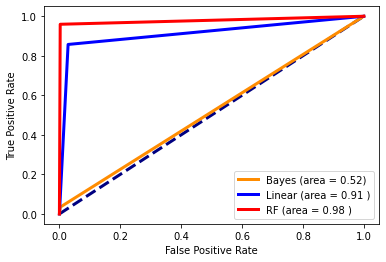

In [24]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')

plt.plot(bay_fpr, bay_tpr, color='darkorange',
         lw=3, label='Bayes (area = %s)' % round(bay_rocauc, 2))
plt.plot(lin_fpr, linr_tpr, color='blue',
         lw=3, label='Linear (area = %s )' % round(lin_rocauc, 2))
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=3, label='RF (area = %s )' % round(rf_rocauc, 2))
plt.legend()
plt.show()